In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'E:\carlogo\dataset\Train'
valid_path = 'E:\carlogo\dataset\Test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False


In [5]:
folders = glob('E:\carlogo\dataset\Train\*')

In [6]:
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('E:\carlogo\dataset\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('E:\carlogo\dataset\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 58 images belonging to 3 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 19s 10s/step - loss: 4.7694 - accuracy: 0.3750 - val_loss: 7.5325 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 14s 7s/step - loss: 7.0384 - accuracy: 0.3125 - val_loss: 5.0473 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 15s 8s/step - loss: 5.5986 - accuracy: 0.3906 - val_loss: 5.9950 - val_accuracy: 0.3103
Epoch 4/50
2/2 [==============================] - 16s 8s/step - loss: 4.2621 - accuracy: 0.5000 - val_loss: 6.0858 - val_accuracy: 0.1379
Epoch 5/50
2/2 [==============================] - 15s 8s/step - loss: 2.8633 - accuracy: 0.4375 - val_loss: 1.5394 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 15s 7s/step - loss: 2.0593 - accuracy: 0.4688 - val_loss: 2.2532 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 15s 7s/step - loss: 2.8198 - accuracy: 0.4844

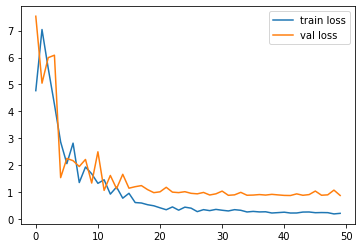

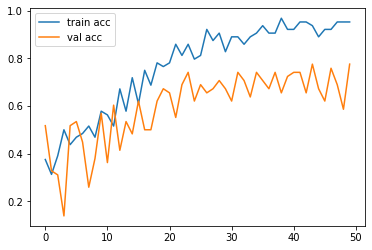

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

model.save('model_resnet501.h5')

In [16]:

y_pred = model.predict(test_set)

In [17]:

y_pred

array([[2.33491473e-02, 7.35740038e-03, 9.69293475e-01],
       [1.49689853e-01, 7.19709694e-01, 1.30600408e-01],
       [6.01839125e-01, 2.58082539e-01, 1.40078381e-01],
       [8.53225112e-01, 1.57837700e-02, 1.30991146e-01],
       [4.36961744e-03, 9.95015085e-01, 6.15295197e-04],
       [2.74333637e-02, 7.02331603e-01, 2.70235062e-01],
       [5.65774404e-02, 2.15093017e-01, 7.28329599e-01],
       [2.00384840e-01, 6.49555624e-01, 1.50059551e-01],
       [5.85929911e-06, 2.34412123e-03, 9.97650087e-01],
       [2.45877150e-02, 8.77323449e-01, 9.80887711e-02],
       [1.95420206e-01, 5.65990984e-01, 2.38588870e-01],
       [5.45955671e-04, 8.42143059e-01, 1.57311052e-01],
       [6.06876612e-02, 5.84905505e-01, 3.54406863e-01],
       [1.25525575e-02, 7.56763816e-01, 2.30683625e-01],
       [1.15537673e-01, 2.02724963e-01, 6.81737363e-01],
       [3.95503640e-02, 4.96495843e-01, 4.63953853e-01],
       [9.56130922e-01, 3.20493802e-02, 1.18197259e-02],
       [1.86145939e-02, 9.51748

In [18]:
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [20]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet501.h5')


In [22]:
img=image.load_img(r'E:\carlogo\Test\lamborghini\11.jpg',target_size=(224,224))

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\carlogo\\Test\\lamborghini\\11.jpg'

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1